# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [2.2.2 Data Resource](#2.2.2_Data_Resource)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The Ski Resort Data](#2.5_Load_The_Ski_Resort_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Explore target feature](#2.6.1_Explore_Target_Feature)
    * [2.6.2 Data Type Conversion](#2.6.2_Data_Type_Conversion)
    * [2.6.3 Number of missing values](#2.6.3_Missing_Values)
  * [2.7 Create New DataFrame and Save the Data](#2.7_Create_New_DataFrame_Save_Data)
  * [2.8 Drop Rows With No Price Data](#2.8_Drop_Rows_With_No_Price_Data)
  * [2.9 Review distributions](#2.9_Review_distributions)
  * [2.10 Population data](#2.10_Population_data)
  * [2.11 Target Feature](#2.11_Target_Feature)
    * [2.11.1 Number Of Missing Values By Row - Resort](#2.11.1_Number_Of_Missing_Values_By_Row_-_Resort)
  * [2.12 Save data](#2.12_Save_data)
  * [2.13 Summary](#2.13_Summary)


## 2.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting your data, organizing it, and making sure it's well defined. Also preliminary cleaning will be done here before exploratory further in the subsequent notebook.

### 2.2.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this project is to come up with a linear model to predict the air quality index in the Kathmandu city and provide the air quality forecast. The air quality index provides extent of air pollutant such as pm2.5, o3, co, so2 and so on in the air. With a city that is undergoing such a marked increase in its economy and all the growth associated with it, there will be a large amount of environmental challenges ahead as many developing cities in Asia have been witness to, many of which are still going through them. With a reduction in the amount of diesel fuel vehicles as well as open burn sources being cracked down on, Kathmandu may be able to see some form of improvement in its air quality in the years to come.

PM2.5 refers to particulate matter that is 2.5 micrometers or less in diameter, and due to its small size and subsequent dangers to human health, is used as a major component in calculating overall air quality.


![EPA standard air quality levels](../images/air_quality_index_level.png)

### 2.2.2 Data Resource<a id='2.2.2_Data_Resource'></a>

I am using two sets of data for this project. Daily average weather data from totimpo.net and air quality data from Phora Darbar US embassy in Kathmandu. 

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:

#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mnso
import os

## 2.4 Objectives<a id='2.4_Objectives'></a>

These are the main objectives for this notebook. Before moving to next exploratory data analysis, I will try to find answer of these questions. 

* Are we dealing with correct data for this project?
    * Does we have correct target variable?
    * Feature we collected are right feature to predict what we want to do?
* Is there any issue with the data?

These question will be answer briefly at the end. 

## 2.5 Load The Air Quality data.<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [2]:
# the supplied CSV data file is the raw_data directory
aq_data1 = pd.read_csv('../data/realdata/us_embassy-phora-durbar-kathmandu-air-quality.csv')
#aq_data2 = pd.read_csv('../data/realdata/us-embassy-kathmandu-air-quality.csv')

Good first steps in auditing the data are the info method and displaying the first few records with head.

In [3]:
# summary of the data
aq_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1712 non-null   object
 1    pm25   1712 non-null   object
 2    pm10   1712 non-null   object
dtypes: object(3)
memory usage: 40.2+ KB


`pm25` is the particulate matter 2.5 level and `pm10` is the particulate matter 10 level. The overall air quality index would be the maximum of either of these quantities. 

So I will make a different column getting maximum value from these two column and assign as `AQI`. 

In [4]:
# give a quick look in the data
aq_data1.head()

,date,pm25,pm10
0,2022/1/4,164,46
1,2022/1/5,167,45
2,2022/1/6,172,32
3,2022/1/7,146,30
4,2022/1/8,152,21


Data includes most recent date. Next section we will explore more on data.

## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.1 Explore Target Features<a id='2.6.1_Explore_Target_Feature'></a>

Check more info in the data

In [5]:
# look at more summary in the data
aq_data1.describe()

,date,pm25,pm10
count,1712,1712,1712
unique,1712,207,144
top,2017/8/20,61,
freq,1,26,920


Data includes total of 1712 entries. But data is not showing other information correctly.

In [6]:
# check column names
aq_data1.columns

Index(['date', ' pm25', ' pm10'], dtype='object')

Columns names has extra space, lets remove that

In [7]:
aq_data1= aq_data1.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10"})

In [8]:
aq_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1712 non-null   object
 1   pm25    1712 non-null   object
 2   pm10    1712 non-null   object
dtypes: object(3)
memory usage: 40.2+ KB


In [9]:
# check unique value for one of the data feature pm25 in the data to find if there any missing type 
unique_data = aq_data1.pm25.unique()
np.sort(unique_data)

array([' ', ' 100', ' 101', ' 102', ' 103', ' 104', ' 105', ' 106',
       ' 107', ' 108', ' 109', ' 110', ' 111', ' 112', ' 113', ' 114',
       ' 115', ' 116', ' 117', ' 118', ' 119', ' 120', ' 121', ' 122',
       ' 123', ' 124', ' 125', ' 126', ' 127', ' 128', ' 129', ' 130',
       ' 131', ' 132', ' 133', ' 134', ' 135', ' 136', ' 137', ' 138',
       ' 139', ' 140', ' 141', ' 142', ' 143', ' 144', ' 145', ' 146',
       ' 147', ' 148', ' 149', ' 150', ' 151', ' 152', ' 153', ' 154',
       ' 155', ' 156', ' 157', ' 158', ' 159', ' 160', ' 161', ' 162',
       ' 163', ' 164', ' 165', ' 166', ' 167', ' 168', ' 169', ' 170',
       ' 171', ' 172', ' 173', ' 174', ' 175', ' 176', ' 177', ' 178',
       ' 179', ' 180', ' 181', ' 182', ' 183', ' 184', ' 185', ' 186',
       ' 187', ' 188', ' 189', ' 19', ' 190', ' 191', ' 192', ' 193',
       ' 194', ' 195', ' 196', ' 197', ' 199', ' 20', ' 200', ' 201',
       ' 202', ' 203', ' 204', ' 205', ' 206', ' 207', ' 209', ' 21',
       ' 210

Data contains lots of missing value as empty string. Since we know `pm25` and `pm10` are numeric features, so next we will convert those into numeric value. Also, we can change `date` to pandas date-time type. The missing empty string will convert to not a number type by pandas.

### 2.6.2 Data Type Conversion<a id='2.6.2_Data_Type_Conversion'></a>

In [10]:
# there is issue that pm25 and pm10 includes empty row as string. So the following line will convert string to NaN 
# with the option errors='coerce'
aq_data1['pm25'] = pd.to_numeric(aq_data1.pm25,errors='coerce')
aq_data1['pm10'] = pd.to_numeric(aq_data1.pm10,errors='coerce')

In [11]:
# similarly change date to pandas datetime type
aq_data1['date'] = pd.to_datetime(aq_data1.date)

In [12]:
# lets give one more look on the data. We can see right conversion here.
aq_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1712 non-null   datetime64[ns]
 1   pm25    1687 non-null   float64       
 2   pm10    792 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 40.2 KB


Lets check numeric data type again.

In [13]:
aq_data1.describe()

,pm25,pm10
count,1687.000000,792.000000
mean,112.656194,51.044192
std,51.543084,35.886277
min,19.000000,1.000000
25%,64.000000,20.750000
50%,115.000000,45.000000
75%,155.000000,75.250000
max,395.000000,212.000000


This time the data description tells us lots of information. There are few missing values in pm25 but more that 60% missing values for pm10. The minimum value of pm25 is 19 which is reasonable but the maximum value 395 is too high based on EPA standard, it falls in the too hazardous region. It could be possible or may be a false data. Will check those higher values. 

### 2.6.3 Number of missing values<a id='2.6.3_Missing_Values'></a>

Count the number of missing values in each column and sort them.

In [14]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#air quality data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and #'%'
missing = pd.concat([aq_data1.isnull().sum(), 100 * aq_data1.isnull().mean()], axis=1)
missing.columns=["missing count", "missing percentage"]
missing.sort_values(by=['missing count'])

,missing count,missing percentage
date,0,0.000000
pm25,25,1.460280
pm10,920,53.738318


There too many missing values for `pm10`. Lets check those 25 missing values in the pm25 where we can find pm10 data or not.

In [15]:
# check columns with NaN value for pm25 has data on pm10 column. 
aq_data1[aq_data1.pm25.isnull()]

,date,pm25,pm10
1687,2021-08-22,NaN,24.0
1688,2021-08-23,NaN,20.0
1689,2021-08-24,NaN,24.0
1690,2021-06-23,NaN,21.0
1691,2021-06-24,NaN,23.0
1692,2020-10-05,NaN,23.0
1693,2020-10-06,NaN,27.0
1694,2020-10-07,NaN,30.0
1695,2020-10-08,NaN,36.0
1696,2020-07-27,NaN,17.0


This shows the data missing for `pm25` has data on `pm10` for few dates. So we can choose `pm10` values for AQI on those dates. Beside that lets check how many dates has `pm25` higher than `pm10` and vice-versa.

In [16]:
# counts number of data for pm25 higher than pm10 and vice-versa
compareValue = (aq_data1[aq_data1.pm25 > aq_data1.pm10].shape[0],
                         aq_data1[aq_data1.pm25 < aq_data1.pm10].shape[0],  aq_data1[aq_data1.pm25 == aq_data1.pm10].shape[0])

In [17]:
print (f'pm25 > pm10 = {compareValue[0]}')
print (f'pm25 < pm10 = {compareValue[1]}')
print (f'pm 25 == pm10 = {compareValue[2]}')

pm25 > pm10 = 739
pm25 < pm10 = 26
pm 25 == pm10 = 2


Its not comparing NaN data with numeric value. We can just remove NaN values with 0. At the end we don't want those zeros and there is no data that contains 0 in it. 

In [18]:
# fill nan with 0.0 and apply to same dataframe
aq_data1.fillna(0.0,inplace=True)

In [19]:
# check info again
aq_data1.describe()

,pm25,pm10
count,1712.000000,1712.000000
mean,111.011098,23.613902
std,52.920719,35.263008
min,0.000000,0.000000
25%,63.000000,0.000000
50%,114.000000,0.000000
75%,155.000000,36.250000
max,395.000000,212.000000


* Finally create new data frame with date and air quality index column where air quality index value is the maximum value of either pm25 or pm10


## 2.7 Create New DataFrame and Save the Datas<a id='2.7_Create_New_DataFrame_Save_Data'></a>

In [20]:
# create new dataframe from date 
data1 = pd.DataFrame(aq_data1['date'], columns=['date'])

In [21]:
# include AQI column from maximum value of either pm25 or pm10
data1['AQI'] = aq_data1[["pm25", "pm10"]].max(axis=1)

In [22]:
#check data again
data1.head()

,date,AQI
0,2022-01-04,164.0
1,2022-01-05,167.0
2,2022-01-06,172.0
3,2022-01-07,146.0
4,2022-01-08,152.0


In [23]:
# more info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1712 non-null   datetime64[ns]
 1   AQI     1712 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.9 KB


In [24]:
# so no missing data in our final dataset.
data1.describe()

,AQI
count,1712.000000
mean,111.969042
std,51.902166
min,14.000000
25%,64.000000
50%,114.000000
75%,155.000000
max,395.000000


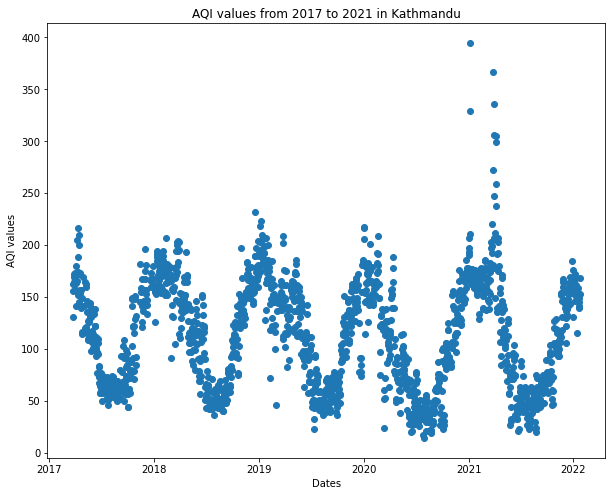

In [25]:
# before saving data lets quickly look air quality index value in different dates 
plt.figure(figsize=(10,8))
plt.scatter(data1['date'],data1['AQI'])
plt.title('AQI values from 2017 to 2021 in Kathmandu')
plt.xlabel('Dates')
plt.ylabel('AQI values')
plt.show()

In [26]:
# order data in ascending date and set date as index
data1.sort_values(by='date',ascending=True,inplace=True)
data1.set_index('date',inplace=True)

In [27]:
data1.head()

,AQI
date,
2017-03-24,162.0
2017-03-25,156.0
2017-03-26,131.0
2017-03-27,169.0
2017-03-28,162.0


Save data in the same folder with different name. Does not include index while saving. 

In [76]:
# save with no index value
data1.to_csv('../data/realdata/airquality_kathmandu.csv',index=True)

* For next part of this notebook, we will explore weather data that was collected and saved yearly from 2017 to 2021. We collected weather data after 2017 to match date for available air quality data. 

## 2.8 Loading Weather Data <a id='2.5_Load_Weather_Data'></a>

In [29]:
# Load weather data skipping first two columns. First two columns contains geolocation information for the weather
# station. 
df1 = pd.read_csv('../data/weather/S444540_2017_climate.csv',skiprows=2)
df2 = pd.read_csv('../data/weather/S444540_2018_climate.csv',skiprows=2)
df3 =  pd.read_csv('../data/weather/S444540_2019_climate.csv',skiprows=2)
df4 = pd.read_csv('../data/weather/S444540_2020_climate.csv',skiprows=2)
df5 = pd.read_csv('../data/weather/S444540_2021_climate.csv',skiprows=2)

In [30]:
# look at one of the dataframe 
df1.head()

,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,RA,SN,TS,FG
0,NaN,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure at sea level,Average relative humidity,Total rainfall and / or snowmelt,Average visibility,Average wind speed,Maximum sustained wind speed,Maximum speed of wind,Indicate if there was rain or drizzle (In the ...,"Snow indicator (In the monthly average, total ...",Indicates whether there storm (In the monthly ...,Indicates whether there was fog (In the monthl...
1,2017-01-01,8.3,14.5,3,-,84,0,3.9,5.2,11.1,-,o,NaN,o,NaN
2,2017-01-02,9.3,19,2.6,-,71,0,5.3,7.2,18.3,-,o,NaN,o,NaN
3,2017-01-03,9.6,18,3,-,67,0,6.3,4.1,13,-,NaN,NaN,NaN,NaN
4,2017-01-04,9.4,19,2.8,-,66,0,6,5.2,14.8,-,NaN,NaN,NaN,NaN


* Each year data includes daily average weather information, such as temperature, pressure, humidity, visibility, wind speed and so on. 


In [31]:
# check features more info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Day     365 non-null    object
 1   T       366 non-null    object
 2   TM      366 non-null    object
 3   Tm      366 non-null    object
 4   SLP     366 non-null    object
 5   H       366 non-null    object
 6   PP      366 non-null    object
 7   VV      366 non-null    object
 8   V       366 non-null    object
 9   VM      366 non-null    object
 10  VG      366 non-null    object
 11  RA      90 non-null     object
 12  SN      2 non-null      object
 13  TS      42 non-null     object
 14  FG      6 non-null      object
dtypes: object(15)
memory usage: 43.0+ KB


* There are abbreviations as column name and its elaboration on the next column. Here are more explanation of these abbreviation:

**T** Average Temperature (C) 

**TM** Maximum Temperature (C)

**Tm** Minimum Temperature (C)

**SLP** Atmospheric pressure at sea level(hPa). 

**H** Average relative humidity (%)

**PP** Total rainfall and /or snowmelt (mm)

**VV** Average visibility (Km)

**V** Average wind speed (Km/h)

**VM** Maximum sustained wind speed (Km/h)

**VG** Maximum speed of wind (Km/h)

**RA** Indicate if there was rain or drizzle (In monthly average, total days it rained)

**SN** Snow indicator (In the monthly average, total days that snowed)

**TS** Indicates whether there storm(In the monthly average, Total days with thunderstorm) 

**FG** Indicates whether there was fog (In the monthly average, Total days with fog)

### 2.8.1 Explore Weather Data<a id='2.6.2_Explore_Weather_Data'></a>

First row of that includes total form for these abbreviation in our data. Lets remove that row.

In [32]:
# drop first row in all year data
df1 = df1.drop(0)
df2 = df2.drop(0)
df3 = df3.drop(0)
df4 = df4.drop(0)
df5 = df5.drop(0)

In [33]:
# add all this data and make a single dataframe
frames = [df1, df2, df3, df4, df5]
we_data = pd.concat(frames)

In [34]:
# check data
we_data.head()

,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,RA,SN,TS,FG
1,2017-01-01,8.3,14.5,3,-,84,0,3.9,5.2,11.1,-,o,NaN,o,NaN
2,2017-01-02,9.3,19,2.6,-,71,0,5.3,7.2,18.3,-,o,NaN,o,NaN
3,2017-01-03,9.6,18,3,-,67,0,6.3,4.1,13,-,NaN,NaN,NaN,NaN
4,2017-01-04,9.4,19,2.8,-,66,0,6,5.2,14.8,-,NaN,NaN,NaN,NaN
5,2017-01-05,10.5,19.5,3,-,60,0,6.4,5.4,13,-,NaN,NaN,NaN,NaN


In [35]:
# get info about data 
we_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 1 to 365
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Day     1826 non-null   object
 1   T       1826 non-null   object
 2   TM      1826 non-null   object
 3   Tm      1826 non-null   object
 4   SLP     1826 non-null   object
 5   H       1826 non-null   object
 6   PP      1826 non-null   object
 7   VV      1826 non-null   object
 8   V       1826 non-null   object
 9   VM      1826 non-null   object
 10  VG      1826 non-null   object
 11  RA      467 non-null    object
 12  SN      14 non-null     object
 13  TS      254 non-null    object
 14  FG      38 non-null     object
dtypes: object(15)
memory usage: 228.2+ KB


In [36]:
# shape of data
we_data.shape

(1826, 15)

In total there are 1826 data from 2017 to 2021 days. The above info roughly shows how many missing values are there in each columns. But we don't know what type of data are missing. Since we know these data must be numerical values except Day. Lets check missing data here.

### 2.8.2 Check Missingness in the Data<a id='2.6.2_Handling_Missing_Data'></a>

#### 2.8.2.1 Featurewise missingness handling<a id='2.8.2.1_Featurewise_Missingness'></a>

In [37]:
# check unique value on each columns 
we_data.nunique().sort_values()

SLP       1
SN        1
RA        2
TS        2
FG        2
VG       27
VM       35
VV       46
V        57
H        69
PP      141
TM      179
T       189
Tm      189
Day    1826
dtype: int64

 Eventhough these data should have continuous numeric type, we got `SLP` has just 1 type. Similary `SN` is also just one type. These data may be completely missing. Beside those other columns such as `RA`, `TS` and `FG`'s are monthly average days for rain,storm and fog which shows there are only two types. These columns looks suspecious as well. 

In [38]:
# check values in SLP colums
we_data.SLP.unique()

array(['-'], dtype=object)

It only contain - value. Add this column to drop column list

In [39]:
# drop column's list
drop_list = ['SLP']

In [40]:
# check for SN
we_data.SN.unique()

array([nan, '-'], dtype=object)

Interesting, it has nan and - values only. Since geographically Kathmandu valley never had snow, having no values make sense for this column. Add this to drop list as well.

#### 2.8.2.2 Drop Columns which contains total missing values<a id='2.8.2.1_Featurewise_Missingness'></a>

In [41]:
# append SN feature
drop_list.append('SN')

In [42]:
# check other features
we_data.RA.unique(), we_data.TS.unique(), we_data.FG.unique()


(array(['o', nan, '-'], dtype=object),
 array(['o', nan, '-'], dtype=object),
 array([nan, 'o', '-'], dtype=object))

By suprise, all these feature does not have numeric value, only has no relevant string or values. So lets keep those column in the dropping list as well.

In [43]:
# append RA, TS, FG in the drop list
drop_list.append('RA')
drop_list.append('TS')
drop_list.append('FG')

In [44]:
# check drop list and drop columns from weather data
drop_list
we_data.drop(columns=drop_list, inplace=True)

In [45]:
# get info again
we_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 1 to 365
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Day     1826 non-null   object
 1   T       1826 non-null   object
 2   TM      1826 non-null   object
 3   Tm      1826 non-null   object
 4   H       1826 non-null   object
 5   PP      1826 non-null   object
 6   VV      1826 non-null   object
 7   V       1826 non-null   object
 8   VM      1826 non-null   object
 9   VG      1826 non-null   object
dtypes: object(10)
memory usage: 156.9+ KB


#### 2.8.2.3 Convert Data to float values<a id='2.8.2.3_Featurewise_Missingness'></a>

In [46]:
# replace any - value with nan
we_data = we_data.replace('-',np.NaN).astype(we_data.dtypes)

**Data Type** Lets convert object to float data type for each of these variable

In [47]:
# change to float type for all features except Day.
we_data.columns
for col in we_data.columns:
    if (col == 'Day'):
        continue
    else:
        we_data[col] = we_data[col].astype('float')

In [48]:
# also convert Day to pandas datetime type and rename to date 
we_data['Day'] = pd.to_datetime(we_data.Day)
we_data.rename({'Day':'date'}, axis=1, inplace=True)
we_data.set_index('date',inplace=True)

In [49]:
# get info again
we_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2017-01-01 to 2021-12-31
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1812 non-null   float64
 1   TM      1812 non-null   float64
 2   Tm      1812 non-null   float64
 3   H       1811 non-null   float64
 4   PP      1635 non-null   float64
 5   VV      1812 non-null   float64
 6   V       1812 non-null   float64
 7   VM      1812 non-null   float64
 8   VG      93 non-null     float64
dtypes: float64(9)
memory usage: 142.7 KB


#### 2.8.2.4 Further Check Null Values<a id='2.8.2.1_Featurewise_Missingness'></a>

In [50]:
# get null dataframe and see there is any pattern of missingness 
weather_nullity = we_data.isnull()


In [51]:
# total missing value on each column
weather_nullity.sum()

T       14
TM      14
Tm      14
H       15
PP     191
VV      14
V       14
VM      14
VG    1733
dtype: int64

In [52]:
# see percentage missing
weather_nullity.mean()*100

T      0.766703
TM     0.766703
Tm     0.766703
H      0.821468
PP    10.460022
VV     0.766703
V      0.766703
VM     0.766703
VG    94.906900
dtype: float64

Large portion of data were missing from `VG` features. So remove this feature as well. 

In [53]:
# drop VG column in both we_data and weather_nullity
we_data.drop(columns=['VG'],inplace=True)
weather_nullity.drop(columns=['VG'],inplace=True)

In [54]:
# sort datebase based on date if it is not
we_data.sort_values(by='date')

,T,TM,Tm,H,PP,VV,V,VM
date,,,,,,,,
2017-01-01,8.3,14.5,3.0,84.0,0.00,3.9,5.2,11.1
2017-01-02,9.3,19.0,2.6,71.0,0.00,5.3,7.2,18.3
2017-01-03,9.6,18.0,3.0,67.0,0.00,6.3,4.1,13.0
2017-01-04,9.4,19.0,2.8,66.0,0.00,6.0,5.2,14.8
2017-01-05,10.5,19.5,3.0,60.0,0.00,6.4,5.4,13.0
...,...,...,...,...,...,...,...,...
2021-12-27,9.7,17.0,4.0,76.0,0.00,4.3,5.9,14.8
2021-12-28,10.2,15.0,3.6,77.0,0.00,3.2,5.2,13.0
2021-12-29,7.3,9.0,6.8,99.0,37.34,4.5,3.7,13.0


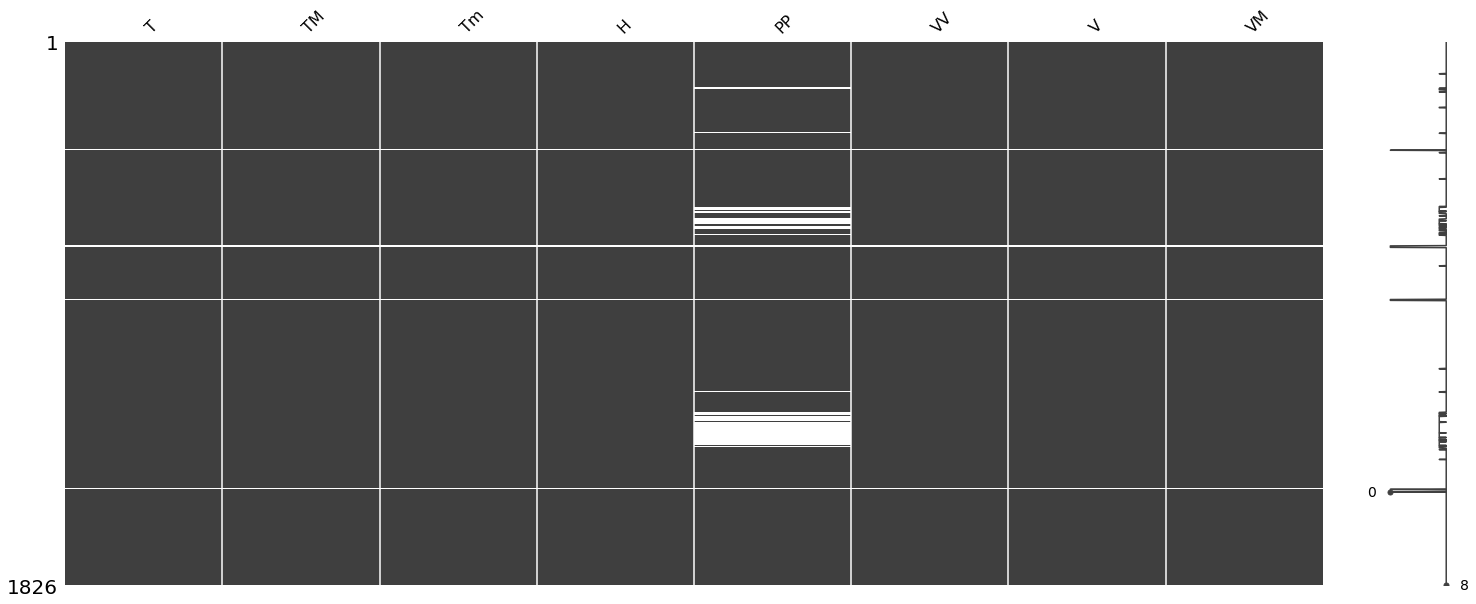

In [55]:
# see weather null dataframe to get more idea of null values present in other features such as PP has 10%
mnso.matrix(we_data)

In [56]:
we_data.shape

(1826, 8)

Missing data on all features except `PP` has same randomness that is, no recording on those date. May be sensor was not working or some other cause. Let remove data on those date. What about `PP` values that correspond to total rainfall. Maybe no rainfall on missing data dates. First lets remove days with missing values on all other features.

In [57]:
# drop row with nan values in temperature feature; which is true for all other columns except PP
we_data.dropna(subset=['T'],inplace=True)

In [58]:
we_data.shape

(1812, 8)

In [59]:
we_data.isna().mean()*100

T     0.000000
TM    0.000000
Tm    0.000000
H     0.055188
PP    9.768212
VV    0.000000
V     0.000000
VM    0.000000
dtype: float64

9% data are missing for pricipitation values. Check if there is any hidden missing values in it. 


In [60]:
we_data.describe()

,T,TM,Tm,H,PP,VV,V,VM
count,1812.000000,1812.000000,1812.000000,1811.000000,1635.000000,1812.000000,1812.000000,1812.000000
mean,18.374172,25.450000,13.119592,74.414688,3.464159,6.338576,6.675497,18.596192
std,5.145533,4.356901,6.392535,12.182126,9.632599,1.215793,1.558818,5.467774
min,7.200000,9.000000,0.000000,30.000000,0.000000,1.900000,1.300000,5.400000
25%,13.900000,22.200000,7.500000,67.000000,0.000000,5.600000,5.600000,14.800000
50%,19.450000,26.500000,13.700000,75.000000,0.000000,6.600000,6.500000,18.300000
75%,23.100000,29.000000,19.500000,84.000000,1.520000,7.200000,7.600000,21.700000
max,26.400000,33.500000,22.000000,100.000000,121.670000,9.200000,20.200000,66.500000


Seems like `PP` has minimum upto 50 percentile is 0.0 values. Lets see histogram from this variable. 

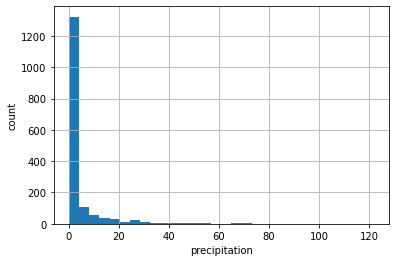

In [61]:
we_data.PP.hist(bins=30)
plt.xlabel('precipitation')
plt.ylabel('count');

* how many days have more than zero precipitation. How many days have Nan values. And how many days have 0.0 precipitaion?


In [62]:
# PP variable summary.
print (f'Total number days for precipitation greater that 0.0: {we_data.PP[we_data.PP > 0.0].value_counts().sum()}')
print (f'Total number days for precipitation equal to 0.0: {we_data.PP[we_data.PP == 0.0].value_counts().sum()}')
print (f'Total number days for precipitation has NaN value : {we_data.PP.isnull().sum()}')

Total number days for precipitation greater that 0.0: 521
Total number days for precipitation equal to 0.0: 1114
Total number days for precipitation has NaN value : 177


For now I will keep this feature replacing Nan value with 0.0. The model prediction will be check with or without this feature in the future

In [63]:
we_data['PP'].fillna(0.0,inplace=True)

In [64]:
we_data.isna().mean()*100

T     0.000000
TM    0.000000
Tm    0.000000
H     0.055188
PP    0.000000
VV    0.000000
V     0.000000
VM    0.000000
dtype: float64

In [65]:
# The last feature that has zeor missing value is humidity. Lets check data that has nan value for humidity
we_data.describe()

,T,TM,Tm,H,PP,VV,V,VM
count,1812.000000,1812.000000,1812.000000,1811.000000,1812.000000,1812.000000,1812.000000,1812.000000
mean,18.374172,25.450000,13.119592,74.414688,3.125773,6.338576,6.675497,18.596192
std,5.145533,4.356901,6.392535,12.182126,9.207422,1.215793,1.558818,5.467774
min,7.200000,9.000000,0.000000,30.000000,0.000000,1.900000,1.300000,5.400000
25%,13.900000,22.200000,7.500000,67.000000,0.000000,5.600000,5.600000,14.800000
50%,19.450000,26.500000,13.700000,75.000000,0.000000,6.600000,6.500000,18.300000
75%,23.100000,29.000000,19.500000,84.000000,0.760000,7.200000,7.600000,21.700000
max,26.400000,33.500000,22.000000,100.000000,121.670000,9.200000,20.200000,66.500000


In [66]:
# count total data with missing humidity
we_data.H.isna().sum()

1

In [67]:
# its just one data point. add humidity from earlier day on this day
we_data['H'].fillna(method='ffill',inplace=True)

In [68]:
we_data.isna().mean()*100

T     0.0
TM    0.0
Tm    0.0
H     0.0
PP    0.0
VV    0.0
V     0.0
VM    0.0
dtype: float64

## 2.9 Combine Weather and Climate Data<a id='2.9_Combine_Two_Data'></a>

In [69]:
data = pd.merge(we_data,data1,how='inner',left_index=True,right_index=True)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1675 entries, 2017-03-24 to 2021-12-31
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1675 non-null   float64
 1   TM      1675 non-null   float64
 2   Tm      1675 non-null   float64
 3   H       1675 non-null   float64
 4   PP      1675 non-null   float64
 5   VV      1675 non-null   float64
 6   V       1675 non-null   float64
 7   VM      1675 non-null   float64
 8   AQI     1675 non-null   float64
dtypes: float64(9)
memory usage: 130.9 KB


In [72]:
data.describe()

,T,TM,Tm,H,PP,VV,V,VM,AQI
count,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000
mean,18.773134,25.688896,13.649672,75.088358,3.306519,6.395642,6.690687,18.586149,111.018507
std,5.052455,4.346871,6.266066,12.192721,9.493956,1.208813,1.572663,5.380931,52.025385
min,7.200000,9.000000,0.000000,30.000000,0.000000,1.900000,1.300000,5.400000,14.000000
25%,14.600000,22.600000,8.000000,68.000000,0.000000,5.600000,5.600000,14.800000,63.000000
50%,20.200000,27.000000,14.600000,76.000000,0.000000,6.600000,6.500000,18.300000,112.000000
75%,23.200000,29.000000,19.800000,84.000000,1.020000,7.200000,7.800000,20.600000,154.000000
max,26.400000,33.500000,22.000000,100.000000,121.670000,9.200000,20.200000,57.600000,395.000000


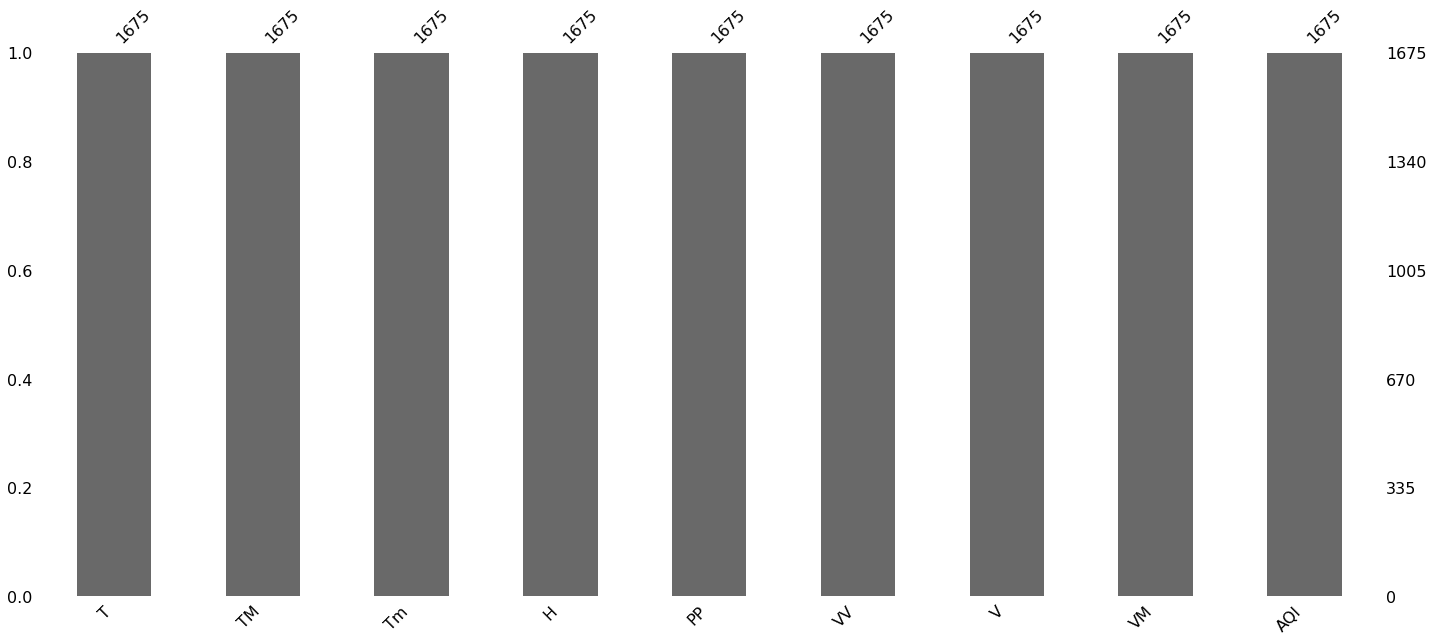

In [74]:
mnso.bar(data)

### No Missing Data

In [75]:
# save data with index true
data.to_csv('../data/realdata/airquality_climate_combine.csv',index=True)